
    Import necessary libraries and load the dataset.
    Load a pre-trained model, VGG16, excluding the top layers.
    Add new layers on top of the base model and compile the model.
    Train the model on the new dataset.
    Unfreeze some of the layers of the pre-trained model and fine-tune them.


**Step 1 : Setup the environment**

In [4]:
# Import thr libraries

!pip install tensorflow

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Explanation:

    tensorflow is the main library for machine learning in Python.
    Sequential is used to create a model with a linear stack of layers.
    Dense and Flatten are types of layers that we will use in our model.



**Step 2 : Load Pre-trained Model**

In [6]:
# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the base model Layers
for layer in base_model.layers:
  layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Step 3 : Create and compile the Model**

In [11]:
# Create a new model and add the base model and new layer
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Complie the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Create Placeholder images

In [15]:
import os
from PIL import Image
import numpy as np

# Create directories if they dont exist
os.makedirs('sample_data/class_a', exist_ok=True)
os.makedirs('sample_data/class_b', exist_ok=True)

# Create 10 sample images for each class
for i in range(10):
  # Create a blank white image for class_a
  img = Image.fromarray(np.zeros((224,224,3), dtype=np.uint8) * 255)
  img.save(f'sample_data/class_a/img_{i}.jpg')

  # Create a blank black image for class_b
  img = Image.fromarray(np.zeros((224,224,3), dtype=np.uint8))
  img.save(f'sample_data/class_b/img_{i}.jpg')

print("Sample images created in 'sample_data/'")

Sample images created in 'sample_data/'


**Step 4 : Train the Model**

In [17]:
# Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Verify if the generator has loaded images correctly
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")

# Train the model
if train_generator.samples > 0:
    model.fit(train_generator, epochs=10)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.5000 - loss: 0.9152
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: 6.6827
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 4.9039
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 1.5561
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.6931


**Step 5 : Fine-Tune the model**

In [19]:
# Unfreeze the top layers of the base model

for layer in base_model.layers[-4:]:
  layer.trainable = True

# Compile the model again
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model again
model.fit(train_generator, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.5000 - loss: 0.6931


 Visualize Training and Validation Loss

 Plot the training and validation loss to observe the learning process of the model.



Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 9/10


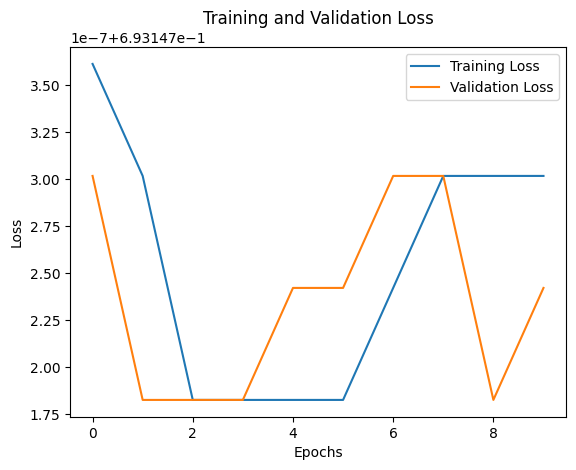

In [22]:
# Modify data generator to include vaalidation data
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
 )

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with validation data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Experiment with Different Optimizers

Experiment with different optimizers and observe their impact on model performance.

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931


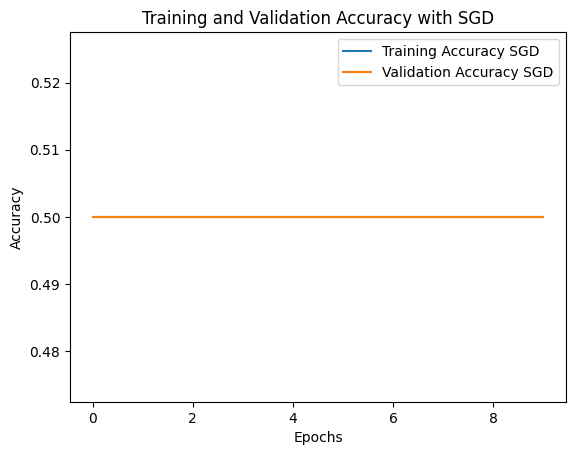

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931


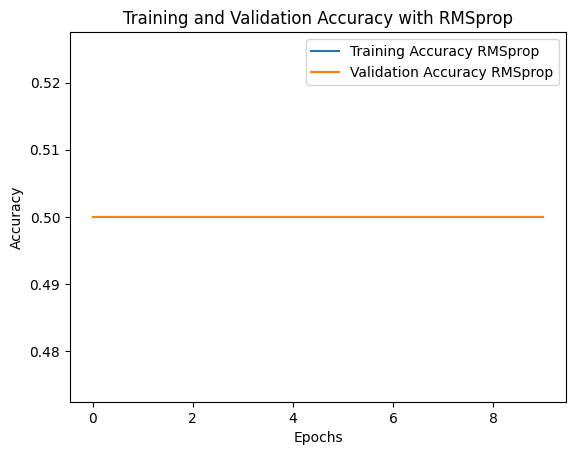

In [23]:
from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

# Function to reset the model weights
def reset_model(model):
    # Clone the model to reset weights
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights())
    return model_clone

# Prepare to reset the model for each optimizer test
initial_model = reset_model(model)  # Assume 'model' is the initial compiled model

# Experiment with SGD optimizer
sgd_model = reset_model(initial_model)  # Reset model
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for SGD
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy SGD')
plt.title('Training and Validation Accuracy with SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Experiment with RMSprop optimizer
rmsprop_model = reset_model(initial_model)  # Reset model
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for RMSprop
plt.plot(history_rmsprop.history['accuracy'], label='Training Accuracy RMSprop')
plt.plot(history_rmsprop.history['val_accuracy'], label='Validation Accuracy RMSprop')
plt.title('Training and Validation Accuracy with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 Evaluate the Model on a Test Set

Objective: Evaluate the fine-tuned model on an unseen test set to assess its generalization performance.

In [24]:
# Load and preprocess the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the fine-tuned model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

Found 20 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.5000 - loss: 0.6931
Test Accuracy: 50.00%
Test Loss: 0.6931
